Premier réseau à 2 perceptrons /  2 neurones
(basé sur les tutoriels vidéos de Machine Learnia)

On s'intéresse ici à un jeu de données à 2 entrées (x1, x2) et une validation en tout ou rien (0 ou 1)

## Bibliothèques

In [1]:
# Perceptron Simple
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import accuracy_score
from tqdm import tqdm

## Fonctions du réseau

### Initialisation

Les paramètres du réseau de 2 neurones sont initialisés à des valeurs aléatoires

In [2]:
def initialisation(dimensions):
    parametres = {}
    C = len(dimensions)

    np.random.seed(1)

    for c in range(1, C):
        parametres['W' + str(c)] = np.random.randn(dimensions[c], dimensions[c - 1])
        parametres['b' + str(c)] = np.random.randn(dimensions[c], 1)

    return parametres

### Modèle / Forward Propagation

On définit ici l'évolution du modèle selon une loi linéaire : Z = w1 * x1 + w2 * x2 + b

Une fonction d'activation de type sigmoide est ensuite calculée.

In [3]:
def forward_propagation(X, parametres):
    activations = {'A0': X}

    C = len(parametres) // 2

    for c in range(1, C + 1):
        Z = parametres['W' + str(c)].dot(activations['A' + str(c - 1)]) + parametres['b' + str(c)]
        activations['A' + str(c)] = 1 / (1 + np.exp(-Z))

    return activations

### Fonction de coût

Fonction permettant de quantifier les erreurs commises par le modèle

In [4]:
# quantifier les erreurs commises par le modèle
def log_loss(A, y):
    # Attention probleme d'overflow de la fonction exp du modèle qui entraine des A valant 0 ou 1.
    # Or dans la fonction log_loss, log(0) est non défini !!
    # on insère un epsilon faible volontairement
    epsilon = 1e-15
    return 1 / len(y) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon))

### Descente de gradients / Back Propagation

In [5]:
def back_propagation(y, parametres, activations):
    m = y.shape[1]
    C = len(parametres) // 2

    dZ = activations['A' + str(C)] - y
    gradients = {}

    for c in reversed(range(1, C + 1)):
        gradients['dW' + str(c)] = 1/m * np.dot(dZ, activations['A' + str(c - 1)].T)
        gradients['db' + str(c)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
        if c > 1:
            dZ = np.dot(parametres['W' + str(c)].T, dZ) * activations['A' + str(c - 1)] * (1 - activations['A' + str(c - 1)])

    return gradients

### Mise à jour des paramètres

In [6]:
def update(gradients, parametres, learning_rate):
    C = len(parametres) // 2

    for c in range(1, C + 1):
        parametres['W' + str(c)] = parametres['W' + str(c)] - learning_rate * gradients['dW' + str(c)]
        parametres['b' + str(c)] = parametres['b' + str(c)] - learning_rate * gradients['db' + str(c)]

    return parametres

### Prediction

Prédiction d'un ensemble de données vis-à-vis du modèle

In [7]:
def predict(X, parametres):
    activations = forward_propagation(X, parametres)
    C = len(parametres) // 2
    Af = activations['A' + str(C)]
    return Af >= 0.5

## Mise en place d'un réseau de N couches de neurones

Algorithme de calcul des paramètres du modèle sur un certain nombre d'itération (epoch)

Affichage des courbes du coût et de précision/exactitude

In [8]:
def reseau_Ncouches(X, y, hidden_layers = (16, 16, 16), learning_rate = 0.001, n_iter = 3000):

    # initialisation parametres
    dimensions = list(hidden_layers)
    dimensions.insert(0, X.shape[0])
    dimensions.append(y.shape[0])
    print(len(dimensions))
    np.random.seed(1)
    parametres = initialisation(dimensions)

    # tableau numpy contenant les futures accuracy et log_loss
    training_history = np.zeros((int(n_iter), 2))

    C = len(parametres) // 2

    # gradient descent
    for i in tqdm(range(n_iter)):

        activations = forward_propagation(X, parametres)
        gradients = back_propagation(y, parametres, activations)
        parametres = update(gradients, parametres, learning_rate)
        Af = activations['A' + str(C)]

        # calcul du log_loss et de l'accuracy
        training_history[i, 0] = (log_loss(y.flatten(), Af.flatten()))
        y_pred = predict(X, parametres)
        training_history[i, 1] = (accuracy_score(y.flatten(), y_pred.flatten()))

    # Plot courbe d'apprentissage
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(training_history[:, 0], label='train loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(training_history[:, 1], label='train acc')
    plt.legend()
    plt.show()

    return (parametres, training_history)

## Essai 1

### Set de données / Entrainement et test

In [9]:
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.4, random_state=10)
X = X.T
y = y.reshape((1, y.shape[0]))

### Affichage des informations des sets de données

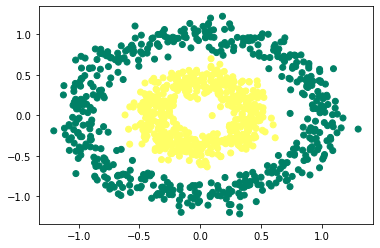

In [10]:
plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.show()

### Entrainement du réseau de neurones

5


100%|██████████| 3000/3000 [00:29<00:00, 102.21it/s]


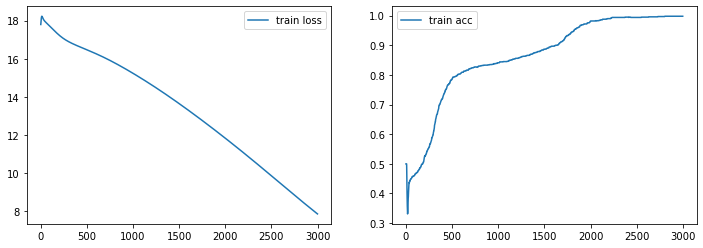

In [11]:
(params, history) = reseau_Ncouches(X, y, hidden_layers = (32, 64, 16), learning_rate = 0.02, n_iter = 3000)

### Predictions

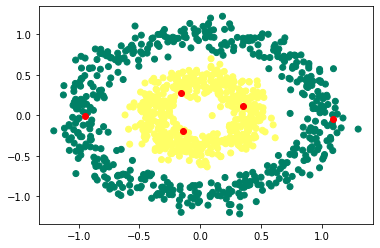

In [12]:
# Prediction sur de nouvelles données
X_valid, y_valid = make_circles(n_samples=5, factor=0.3, noise=0.05, random_state=0)
X_valid = X_valid.T
y_valid = y_valid.reshape(1, y_valid.shape[0])

# affichage des échantillons X et de la nouvelle donnée
plt.figure()
plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.scatter(X_valid[0,:], X_valid[1,:], c='r')
# affichage courbe de décision
plt.show()

In [13]:
print("Predictions : " + str(predict(X_valid, params)))
print("Vraies Vals : " + str(y_valid))

Predictions : [[ True False False  True  True]]
Vraies Vals : [[1 0 0 1 1]]


## Essai 2

### Chargement des données / images

In [14]:
import h5py
def load_data():
    train_dataset = h5py.File('trainset.hdf5', "r")
    X_train = np.array(train_dataset["X_train"][:]) # your train set features
    y_train = np.array(train_dataset["Y_train"][:]) # your train set labels

    test_dataset = h5py.File('testset.hdf5', "r")
    X_test = np.array(test_dataset["X_test"][:]) # your train set features
    y_test = np.array(test_dataset["Y_test"][:]) # your train set labels

    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = load_data()

### Affichage des premières images

dimensions de X: (1000, 64, 64)
dimensions de y: (1000, 1)
1000


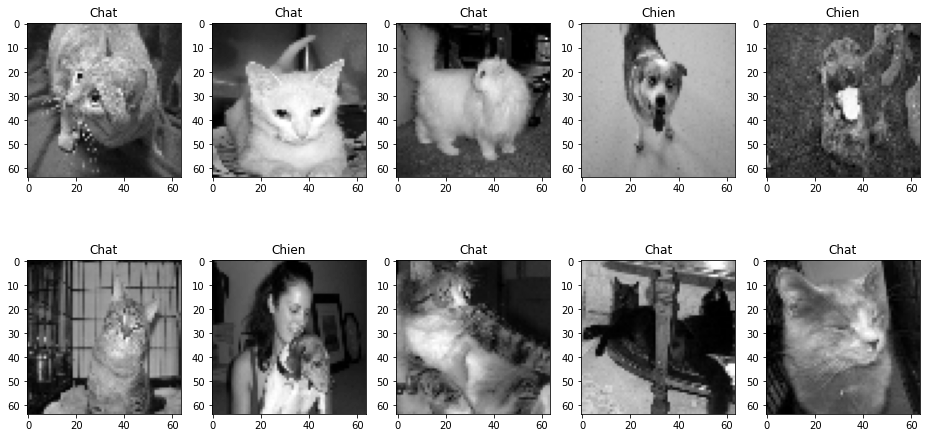

In [15]:
print('dimensions de X:', X_train.shape)
print('dimensions de y:', y_train.shape)
print(len(X_train))

# Affichage des premières images
plt.figure(figsize=(16, 8))
for i in range(1, 11):
    plt.subplot(2, 5, i)
    plt.imshow(X_train[i], cmap='gray')
    if y_train[i] == 1:
        plt.title('Chien')
    else:
        plt.title('Chat')
plt.show()

### Préparation des données

In [16]:
max_train = X_train.max()
X_train = X_train / max_train
X_test = X_test / max_train     # Attention l'entrainement est fait avec le max de X_train
# 2 - passage de 64x64 à 4096*1
X_train_reshape = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_test_reshape = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])

# Premier entrainement
X_train_reshape = X_train_reshape.T
y_train = y_train.T

print('shape = '+str(X_train_reshape.shape))

shape = (4096, 1000)


### Entrainement du modèle

5


100%|██████████| 5000/5000 [01:31<00:00, 54.80it/s]


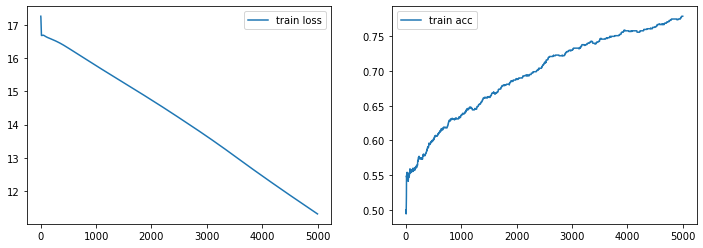

In [17]:
parametres = reseau_Ncouches(X_train_reshape, y_train, (32, 64, 32), learning_rate = 0.05, n_iter = 5000)